In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
r = 0.6
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

In [3]:
def trial_line():
    plots.figure(figsize=(7,7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x_demo, y_demo, s=10)
    #plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
    plots.plot([-4,4],[-4,4], color='r', lw=2)
    #plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.xlabel('x in standard units')
    plots.ylabel('y in standard units');

In [4]:
def trial_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)

In [5]:
def both_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)

In [6]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(7, 7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y, s=10)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

## Prediction ##

In [9]:
galton = Table.read_table('galton.csv')

heights = Table().with_column(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [10]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


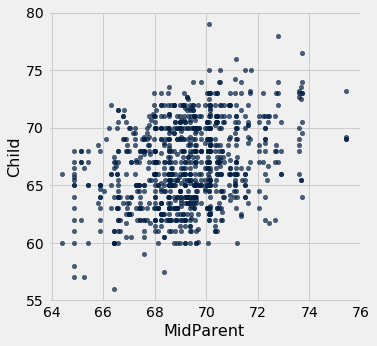

In [11]:
heights.scatter('MidParent')

In [12]:
def predict_child(x):
    chosen = heights.where('MidParent', are.between(x - 0.5, x + 0.5))
    return np.average(chosen.column('Child'))

In [13]:
predictions = heights.apply(predict_child, 'MidParent')

In [14]:
heights = heights.with_column(
    'Original Prediction', predictions
)

In [15]:
heights

MidParent,Child,Original Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


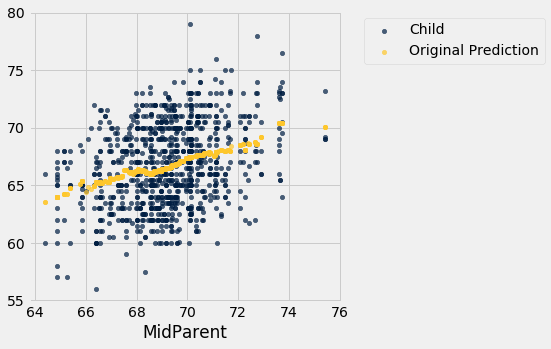

In [16]:
heights.scatter('MidParent')

## Linear Regression ##

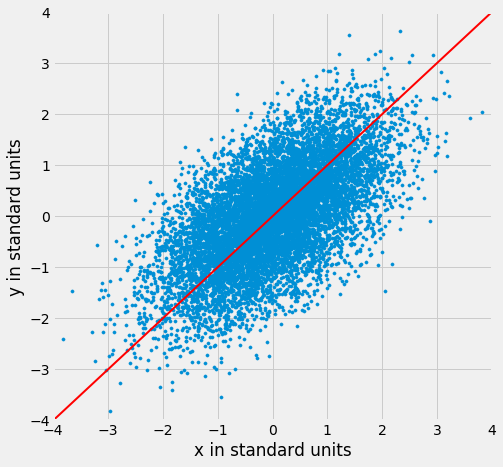

In [28]:
trial_line()

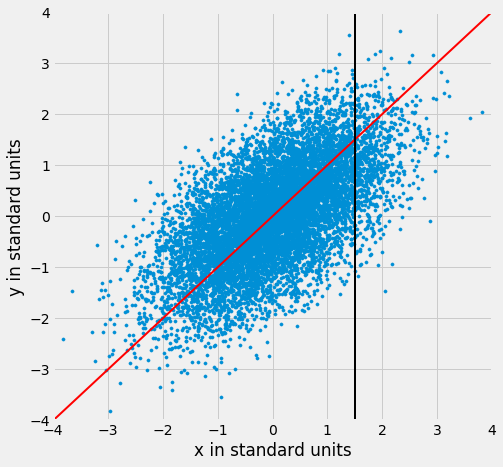

In [29]:
trial_with_vertical()

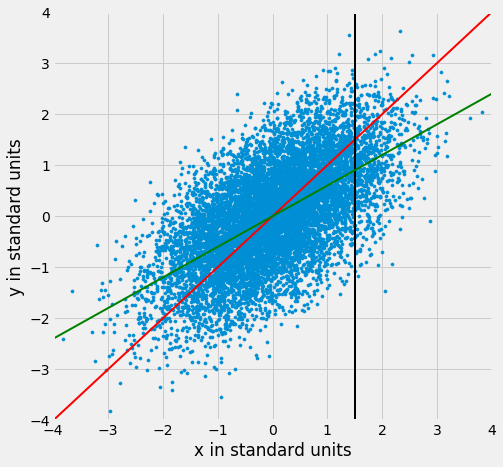

In [30]:
both_with_vertical()

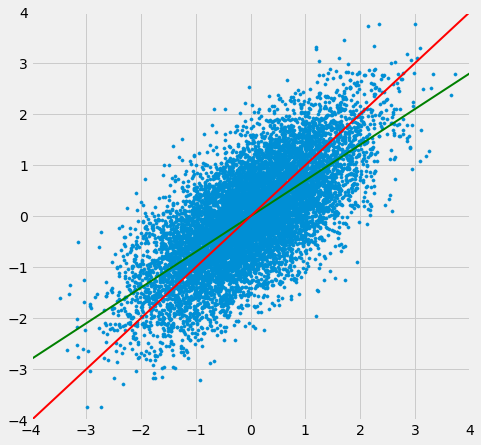

In [37]:
r = 0.7
regression_line(r)

## Equation of the Regression Line ##

In [38]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.average(x_su * y_su)

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a*np.average(t.column(x))

In [39]:
heights

MidParent,Child,Original Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


In [40]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [41]:
heights.take(123)

MidParent,Child,Original Prediction
69.48,71.5,66.7588


In [42]:
galton_slope * 69.48 + galton_intercept

66.92007567102915

In [43]:
def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [44]:
regression_predictions = fitted_values(heights, 'MidParent', 'Child')

In [45]:
heights = heights.with_column(
    'Regression Prediction', regression_predictions
)

In [46]:
heights

MidParent,Child,Original Prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


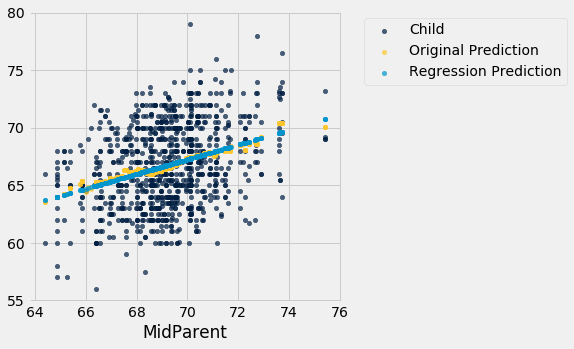

In [47]:
heights.scatter('MidParent')